In [1]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import mglearn

In [2]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, 
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'gender',
          'capital-gain', 'capital-loss', 'hours-per-week','native-country' ,'income']
    )
    
    
data = data[['age', 'workclass','education', 'gender','hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                       '범주형 특성':['양말','여우','양말', '상자']})

display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


# OneHotEncoder

In [4]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct =ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass','education','gender','occupation'])]    ) 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_features, 
                                                    data.income
                                                    , random_state=0)

print(X_train.head())
ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)

log = LogisticRegression(max_iter=5000).fit(X_train_trans, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("LogisticRegression")
print("테스트 점수 : {:.2f}".format(log.score(X_test_trans, y_test)))
print("KneighborsClassifier")
print("테스트 점수 : {:.2f}".format(knn.score(X_test_trans, y_test)))

       age workclass education   gender  hours-per-week          occupation
26464   59   Private      12th     Male              35    Transport-moving
16134   71   Private   Masters   Female              20       Other-service
4747    42   Private   Masters     Male              40      Prof-specialty
8369    26   Private   HS-grad     Male              40               Sales
5741    46   Private   1st-4th     Male              40   Machine-op-inspct
(24420, 44)
LogisticRegression
테스트 점수 : 0.81
KneighborsClassifier
테스트 점수 : 0.78


# MakeColumnTransFormer
클래스 이름을 기반으로 자동으로 각 단계 이름 부여

In [7]:
from sklearn.compose import make_column_transformer


ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass','education','gender','occupation']))
    
ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)

log = LogisticRegression(max_iter=5000).fit(X_train_trans, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("LogisticRegression")
print("테스트 점수 : {:.2f}".format(log.score(X_test_trans, y_test)))
print("KneighborsClassifier")
print("테스트 점수 : {:.2f}".format(knn.score(X_test_trans, y_test)))

(24420, 44)
LogisticRegression
테스트 점수 : 0.81
KneighborsClassifier
테스트 점수 : 0.78


# 구간분할

Linear score = 0.63
DecisionTree score = 0.86


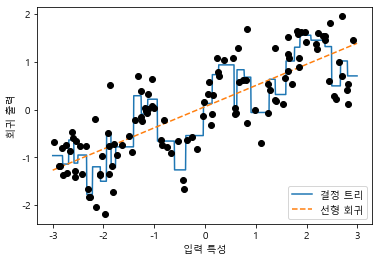

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

dt = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
lreg = LinearRegression().fit(X,y)

plt.plot(line, dt.predict(line), label="결정 트리")
plt.plot(line, lreg.predict(line),'--', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X,y)))
print("DecisionTree score = {:.2f}".format(dt.score(X,y)))

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

# 원본 특성
print(X[:10])
# 원핫
print(X_binned[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Linear score = 0.72
DecisionTree score = 0.72


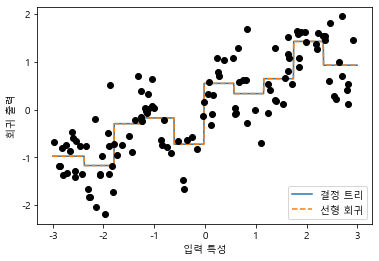

In [10]:
line_binned = kb.transform(line)

dt = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned,y)
lreg = LinearRegression().fit(X_binned,y)

plt.plot(line, dt.predict(line_binned), label="결정 트리")
plt.plot(line, lreg.predict(line_binned),'--', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_binned,y)))
print("DecisionTree score = {:.2f}".format(dt.score(X_binned,y)))

(120, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
Linear score = 0.73


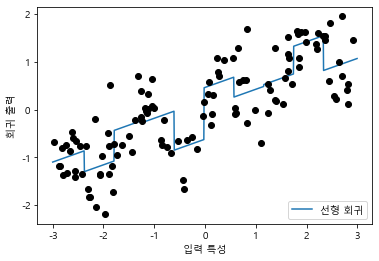

In [11]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)
print(X_combined[:5])
# 상호작용 특성 추가
line_combined = np.hstack([line, line_binned])

lreg = LinearRegression().fit(X_combined,y)

plt.plot(line, lreg.predict(line_combined),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_combined,y)))

(120, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.59195091  0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

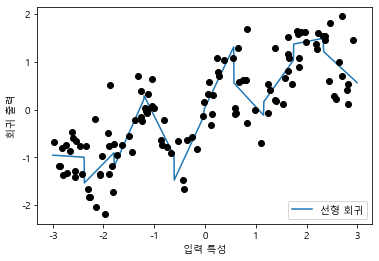

In [12]:
# 구간데이터 * 원본 데이터
X_product = np.hstack([X_binned , X*X_binned])
print(X_product.shape)
print(X_product[:5])
line_product = np.hstack([line_binned, line*line_binned])

lreg = LinearRegression().fit(X_product,y)

plt.plot(line, lreg.predict(line_product),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_product,y)))

Linear score = 0.73


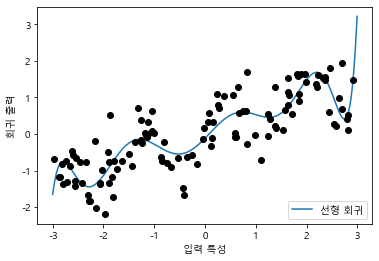

In [13]:
# 다항식 추가
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape
line_poly = poly.transform(line)

lreg = LinearRegression().fit(X_poly,y)

plt.plot(line, lreg.predict(line_poly),'-', label="선형 회귀")

plt.plot(X[:,0], y ,'o', c='k')

plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc=4)

print("Linear score = {:.2f}".format(lreg.score(X_poly,y)))
# 1차원 데이터도 곡선 회귀가 가능함

#보스톤 주텍

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                   boston.target,
                                                   random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


print("다항식특성 적용 후")
print(X_train_poly.shape)
print(X_test_poly.shape)


print(poly.get_feature_names())

(379, 13)
(127, 13)
다항식특성 적용 후
(379, 105)
(127, 105)
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge( ).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753


# 여러 모델에 특성 추가

In [16]:
# minmax로 스케일링만 한 데이터

from sklearn.linear_model import Ridge
print("릿지\n")
# minmax로 스케일링만 한 데이터
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))


# polynomial적용
ridge = Ridge( ).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

print("리니어 리그레션\n")
lr = LinearRegression().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(lr.score(X_test_scaled, y_test)))

# polynomial적용
lr = LinearRegression().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(lr.score(X_test_poly, y_test)))


print("렌덤 포레스트\n")
from sklearn.ensemble import RandomForestRegressor
# minmax로 스케일링만 한 데이터
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))

# polynomial적용
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf.score(X_test_poly, y_test)))

print("그레디언트 부스팅\n")
from sklearn.ensemble import  GradientBoostingRegressor

# minmax로 스케일링만 한 데이터
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(gb.score(X_test_scaled, y_test)))


# polynomial적용
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(gb.score(X_test_poly, y_test)))

# 릿지를 제외하고 성능이 나빠짐
# 이는 데이터의 특성과 모델에 따라 특성추가에 대한 효율성이 달라짐

릿지

상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753
리니어 리그레션

상호작용 특성이 없을 때 점수 : 0.635
상호작용 특성이 있을 때 점수 : 0.607
렌덤 포레스트

상호작용 특성이 없을 때 점수 : 0.795
상호작용 특성이 있을 때 점수 : 0.775
그레디언트 부스팅

상호작용 특성이 없을 때 점수 : 0.815
상호작용 특성이 있을 때 점수 : 0.789


# 열변량 비선형변환

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]]
[[56 18 27]
 [81 57  3]
 [25  9 11]
 [20 13 30]
 [27 13 13]]
[56 81 25 20 27]
특성 출현 횟수 : 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


<BarContainer object of 141 artists>

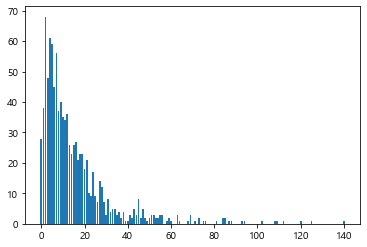

In [17]:
rnd = np.random.RandomState(0) 
X_org = rnd.normal(size=(1000,3)) 
w = rnd.normal(size=3)
X = rnd.poisson(10*np.exp(X_org)) 

y = np.dot(X_org, w)

print(X_org[:5])
print(X[:5])
print(X[:5,0])
print("특성 출현 횟수 : \n{}".format(np.bincount(X[:,0].astype(int))))
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins)

# 특성 자동 선택

X_train.shape :  (284, 80)
X_train_selected.shape :  (284, 48)
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False False False  True False  True False False False  True False False
 False False  True False  True  True  True False  True  True  True  True
 False  True False False  True False  True False False False  True False
 False False False False False  True False False]
27


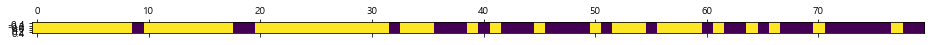

In [18]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = np.random.RandomState(0).normal(size=(len(cancer.data),50))
# 노이즈 특성 50개
# 원본 특성 30개 + 노이즈 50개
X_and_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_and_noise, cancer.target,random_state=0,test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=60)

select.fit(X_train, y_train) 

X_train_selected = select.transform(X_train)

print("X_train.shape : ", X_train.shape)
print("X_train_selected.shape : ", X_train_selected.shape)
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1))

original = mask[:30]
print(np.sum(original==True))
# 노란색이 선택된 부분이다.

# 반복적 특징 선택

28
C:\Users\JS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
특성 선택 전 = 0.940
C:\Users\JS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

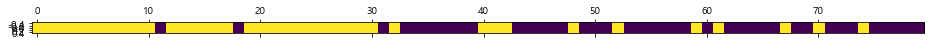

In [19]:
from sklearn.feature_selection  import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),
            n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
print(np.sum(mask[:30]==True))
sc = LogisticRegression(max_iter=3000).fit(X_train, y_train).score(X_test,y_test)
print("특성 선택 전 = {:.3f}".format(sc))

X_train_model = select.fit_transform(X_train, y_train)
X_test_model = select.transform(X_test)

sc = LogisticRegression(max_iter=3000).fit(X_train_model, y_train).score(X_test_model,y_test)
print("특성 선택 후 = {:.3f}".format(sc))

# 전문가 지식 활용

In [20]:
bike = mglearn.datasets.load_citibike()

print("시티 바이크 데이터 : \n" , bike.head())
print(bike.shape)

print(bike.index[0])
print(bike.values[0])

display(bike)

시티 바이크 데이터 : 
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64
(248,)
2015-08-01 00:00:00
3


starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

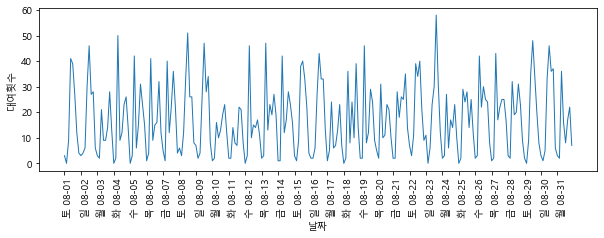

In [21]:
plt.figure(figsize=(10,3))
# 회귀비교
xticks = pd.date_range(start=bike.index.min(), end=bike.index.max())

week = ["일", "월", "화", "수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'), 
                                             xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.xlabel("날짜")
plt.ylabel("대여횟수")

plt.plot(bike, linewidth=1)

In [22]:
y = bike.values

X = bike.index.astype('int64').values.reshape(-1,1) // 10**9

print(X[:5])
print(y[:5])

print(y.shape)

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]]
[ 3  0  9 41 39]
(248,)


테스트 세트 결정 계수 = -0.035


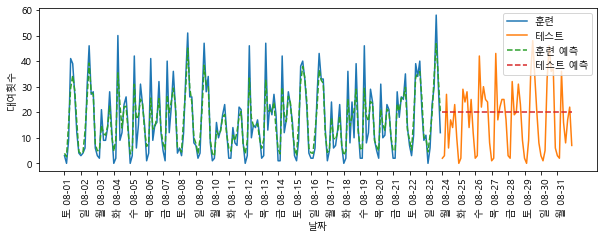

In [23]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 결정 계수 = {:.3f}".format(regressor.score(X_test, y_test)))
    y_pred_test = regressor.predict(X_test)
    y_pred_train  = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8) , xticks_name, rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test)+n_train), y_test,'-', label="테스트")
    
    plt.plot(range(n_train), y_pred_train,'--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred_test,'--', 
             label="테스트 예측")
    
    plt.legend()
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    from sklearn.ensemble import RandomForestRegressor

rr = RandomForestRegressor(random_state=0, n_estimators=100)
eval_on_features(X,y,rr)

테스트 세트 결정 계수 = 0.600
[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]]


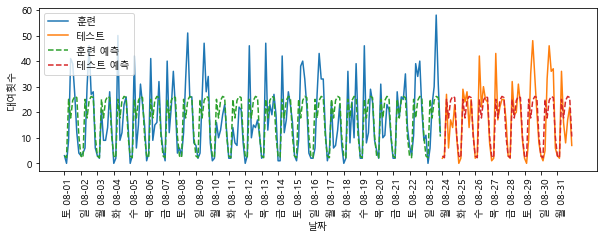

In [24]:
X_hour = bike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, rr)
print(X_hour[:5])


테스트 세트 결정 계수 = 0.842
[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]


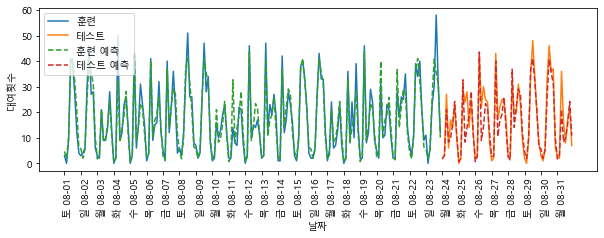

In [25]:
X_hour_week = np.hstack([bike.index.dayofweek.values.reshape(-1,1),
                         bike.index.hour.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, rr)
print(X_hour_week[:5])

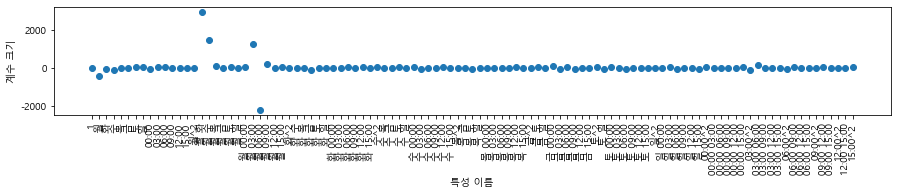

In [26]:
hour= ["%02d:00"%i for i in range(0,24,3)]
day=["월","화","수","목","금","토","일"]
features=day+hour

features_poly = poly.get_feature_names(features)
nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_!=0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

plt.xticks(np.arange(len(coef_nonzero)), nonzero,rotation=90)
plt.show()